# Introduction
This chapter focuses on techniques to improve the algorithm we've developped until now:
* a better cost function: the **cross-entropy cost function**
* four **regularization** methods:
 * $L^1$ regularization
 * $L^2$ regularization
 * dropout
 * artificial expansion of the training data
* better method for **initializing weights **
* heuristics for **hyperparameter** choice
* Other techniques

# I. The cross-entropy cost function

## 1. A problem: neural networks tend to learn slower when they are badly wrong

Humans tend to learn faster when they are badly wrong. But a neural network made up of a single neuron with only one input learns slower when it's badly wrong than when it's just slightly wrong ! The following example features such a neural network, learning to send an input $x = 1$ to output $y(x) = 0$.
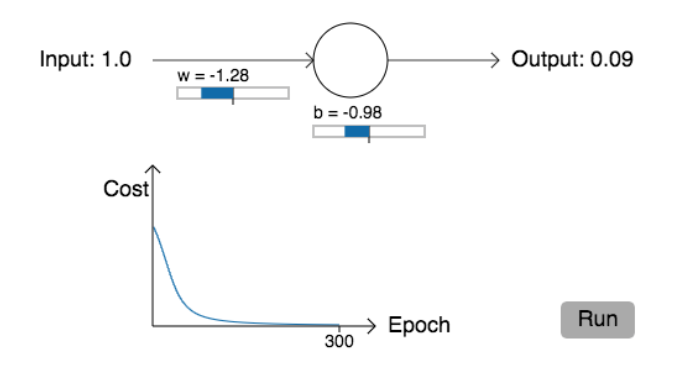

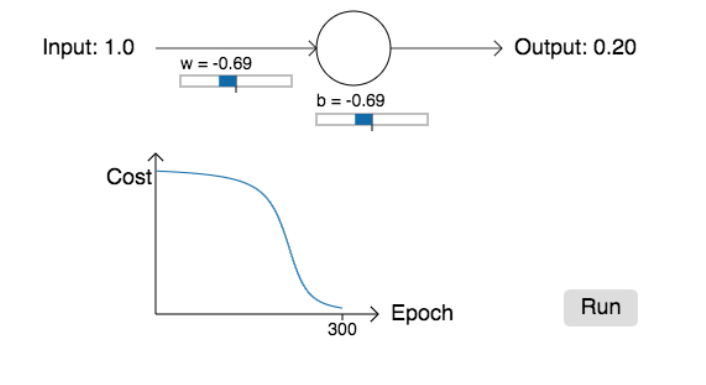

This is also true of more complex neural networks: how could we avoid this kind of behavior ? Well, **why is the learning so slow** ?

Remember the formulas for updating the weights and biases in Gradient Descent: $w \to w' = w - \eta \frac {\partial C} { \partial w}$ and $b \to b' = b - \eta \frac {\partial C} { \partial b}$.

Keeping the learning rate constant, slow learning is due to **small partial derivatives**. The quadratic cost function, in the case of our lone neuron, is:
$$C(w, b) = \frac 1 2 (y-a)^2 = \frac 1 2 (y-\sigma(wx+b))^2 = \frac 1 2 \sigma^2(w + b)$$
for our training input $x = 1$, such that $y(x) = 0$.

Hence the partial derivatives: $\frac {\partial C} {\partial w}= \frac {\partial C} {\partial b} = \sigma(z) \sigma'(z) = a\sigma'(z)$

When the neuron is badly wrong, its output $\sigma(z)$ is close to $1$. This corresponds to values of $z$ where the derivative $\sigma'(z)$ is very small (where $\sigma$'s curve is very flat). Therefore, when the neuron is **badly wrong**, the partial derivatives $\frac {\partial C} {\partial w}= \frac {\partial C} {\partial b}$ are small, and **the learning is slower**.

As I mentioned above, this problem exists in more general neural networks: the fundamental issue has to do with the mathematical properties of the quadratic cost function. Therefore, to solve this issue we need to introduce a **new cost function**. 

## 2. Introducing the cross-entropy cost function, for a single neuron. How it avoids a learning slowdown.

Consider now a usual neuron, the activation of which is given by $a = \sigma(\sum \limits_{i} w_i x_i + b)$. The **cross entropy cost** of this neuron is:

$$C = - \frac 1 n \sum\limits_{x} [y \cdot ln(a) + (1-y)\cdot ln(1-a)]$$

Calling $C$ a cost function is justified by the following observations:
* $C$ is non-negative
* Whether $y=1$ or $y = 0$, $C$ is close to $0$ whenever $a \simeq y$ 

How is this cost function an improvement on the problem mentioned above ? To see this, compute (using the chain rule) the partial derivatives of the cost function with respect to any weight $w_j$:

$\frac {\partial C}{\partial w_j} = \frac {\partial} {\partial {w_j}} \Big[- \frac 1 n \sum\limits_{x} \big( y \cdot ln \big[\sigma(\sum \limits_{i} w_i x_i + b)\big] + (1-y)\cdot ln \big[1-\sigma(\sum \limits_{i} w_i x_i + b)\big] \big) \Big] $



$\frac {\partial C}{\partial w_j} =  - \frac 1 n \sum\limits_{x} \big( y \cdot \frac {\partial} {\partial {w_j}} ln \big[\sigma(\sum \limits_{i} w_i x_i + b)\big] + (1-y)\cdot \frac {\partial} {\partial {w_j}} ln \big[1-\sigma(\sum \limits_{i} w_i x_i + b)\big] \big)  $

$\frac {\partial C}{\partial w_j} =  - \frac 1 n \sum\limits_{x} \big( \frac {yx_j \sigma'(z)} {\sigma(z)} - \frac  {(1-y)x_j \sigma'(z)}{1-\sigma(z)} \big)  $

$\frac {\partial C}{\partial w_j} =  - \frac {\sigma'(z)} {n} \sum\limits_{x} x_j \big( \frac {y} {\sigma(z)} - \frac  {(1-y)}{1-\sigma(z)} \big)  $

$\frac {\partial C}{\partial w_j} =   \frac {\sigma'(z)} {n} \sum\limits_{x} x_j  \frac {\sigma(z) - y} {\sigma(z)(1 - \sigma(z))}   $

Remember: $$\sigma : z \mapsto \frac {1} {1 - e^{-z}}$$
Therefore (Nielsen makes this an exercise) $$\forall z \in \mathbb{R}, \sigma'(z) =  \frac {-e^{-z}} {(1 - e^{-z})^2} = \frac {-e^{-z}} {(1 - e^{-z})} \times \frac {1} {(1 - e^{-z})} = \sigma(z) (1 - \sigma(z))$$

Back in our partial derivative, what's key is that the $\sigma'(z)$ in the numerator and the $\sigma(z)(1 - \sigma(z))$ in the denominator cancel out: $$\boxed {\frac {\partial C} {\partial w_j} = \frac 1 n \sum\limits_x x_j (\sigma(z)-y(x))}$$

The **greater the error** $\sigma(z)-y(x)$ on an input $x$, the greater the partial derivative with respect to any weight, **the faster the neuron learns**. The very same expression works for the partial derivative with respect to the bias of the neuron.

## 3. The cross-entropy cost function, for a neural network. How it avoids a learning slowdown.


The formula is: 

$$ C = - \frac {1} {n} \sum \limits_{x} \sum \limits_{j} [  y_j ln(a^L_j) + (1-y_j)ln(1- a^L_j) ] $$

Let's show that it also avoids a learning slowdown, at least with respect to the weights in the output layer (This is a problem in Nielsen's book):

$$\frac {\partial C} {\partial w^L_{jk}} = - \frac 1 n \sum\limits_x \frac {\partial } {\partial w^L_{jk}} \sum\limits_i  \big[  y_i ln(a^L_i) + (1-y_i)ln(1-a^L_i) \big]$$

$$\frac {\partial C} {\partial w^L_{jk}} = - \frac 1 n \sum\limits_x \frac {\partial } {\partial w^L_{jk}} \big[  y_j ln(\sigma \big[ \sum\limits_k w^L_{jk} a^{L-1}_k + b^L_j \big]) + (1-y_j)ln(1-\sigma \big[ \sum\limits_k w^L_{jk} a^{L-1}_k + b^L_j \big] ) \big]$$

Writing this with sums over $k$ is risky, as $k$ is already taken in $w^L_{jk}$'s notation. Take this into account.

$$\frac {\partial C} {\partial w^L_{jk}} = - \frac 1 n \sum\limits_x \big[  \frac {y_j a^{L-1}_k \sigma'(z^L_j)} {\sigma(z^L_j)} + \frac {(1-y_j) a^{L-1}_k \sigma'(z^L_j)} {1-\sigma(z^L_j)} \big] \ \ \ \ \ \ \ \ \ \ \ \ (*)$$

The same simplification occurs, leaving:
$$\boxed{\frac {\partial C} {\partial w^L_{jk}} = - \frac 1 n \sum\limits_x a^{L-1}_k (y_j - \sigma(z^L_j))}$$

There is **no learning slowdown**, unlike for the **quadratic cost** for which similar calculations would have yielded:

$$\boxed{\frac {\partial C} {\partial w^L_{jk}} = - \frac 1 n \sum\limits_x a^{L-1}_k (y_j - \sigma(z^L_j))\sigma'(z^L_j)}$$

Similar reasoning shows that the cost entropy function also prevents learning slowdown with respect to the **biases**.

## 4. Linear output neurons: an example where the quadratic cost is more appropriate

When we use the **quadratic cost** for **linear output neurons** we end up with: 
$$\frac {\partial C} {\partial w^L_{jk}} =  \frac 1 n \sum\limits_x \frac {\partial } {\partial w^L_{jk}} \big[ \sum\limits_i (y_i(x) - z^L_i)^2 \big]$$

$$\frac {\partial C} {\partial w^L_{jk}} =  \frac 1 n \sum\limits_x \frac {\partial } {\partial w^L_{jk}} \big[ (y_j(x) - \sum \limits_k w^L_{jk} a^{L-1}_k)^2 \big]$$

Same remark about summing over $k$ as above.

$$\frac {\partial C} {\partial w^L_{jk}} =  \frac 1 n \sum\limits_x a^{L-1}_k ( a^L_j - y_j )$$

Therefore the quadratic cost is appropriate in this situation, as it avoids slow learning.

## 5. What does the cross-entropy mean?

### How did we find the cross-entropy function ?

Take the case of one neuron: we know that the slowdown is due to $\sigma '(z)$ getting very small, which makes the partial derivatives small too. This could lead us to look for a cost function satisfying the following equations;

$$\frac  {\partial C} {\partial w_j} = x_j (a-y)$$
$$ \frac {\partial C} {\partial b} = (a-y)$$

We have:
$$ \frac {\partial C} {\partial b} = \frac {\partial C} {\partial a} \sigma'(z)$$
and $\sigma'(z) = \sigma(z)(1 - \sigma(z))$. 

Therefore:
$$ \frac {\partial C} {\partial b} =  \frac {\partial C} {\partial a} a(1-a) $$


So we are looking for a function $C$ such that:

$$ \frac {\partial C} {\partial a} = \frac {a-y} {a(1-a)} $$

Integrating with respect to $a$ gives $\boxed{C = - [y \times ln(a) + (1-y) \times ln(1-a)] + constant}$

### What is the intuitive meaning of cross-entropy function ?

It describes how surprised we are when we find out the correct value $y(x)$ that our estimate $a(x) was approximating$.


# II. Softmax

## 1. Introducing softmax
New type of output layer for our neural networks: $$a^L_j = \frac {exp(z^L_j)} {\sum_i exp(z^L_i)} $$
This is reminiscent of statistical physics and the Boltzmann distribution.
As we shall see below, it allows us to prevent the learning slowdown.


The output is a set of positive numbers the sum of which is $1$. This means that the output layer naturally encodes a **probability distribution**. One can interpret the output activation $a^L_j$ as the network's estimate of the probability that the correct output is $j$. This is not necessarily the case with a sigmoid layer: just consider a network with only one neuron !


## 3. The learning slowdown problem

### The log-likelihood cost function
When dealing with classification problems (*eg* MNIST) it's useful to define the log-likelihood cost function:

$$ C = -ln(a^L_y)$$

where $y$ is the correct output for some input $x$, *ie* the index of the neuron on which the probability mass should be concentrated. It does behave like a cost function should.

The partial derivatives of $C$ with respect to the weights and biases are (just repeatedly apply the chain rule):

$$\frac {\partial C} {\partial w^L_{jk}} = a^{L-1}_k(a^L_j-y_j)$$
$$\frac {\partial C} {\partial b^L_{j}} = (a^L_j-y_j)$$

The expressions are the same as for the cross-entropy: the next question is whether we should use **sigmoid output neurons with a cross entropy cost function** or **softmax output neurons with a log-likelihood cost function**. Both are good: starting from now we'll mostly use the first option. In DL however we will sometimes make the second choice, which is more approriate whenever we want to think of the output as a probability distribution.

## 4. Where does the "softmax" name come from? 

Suppose the output was given by:

$$a^L_j = \frac {e^{cz^L_j}} {\sum_k e^{cz^L_k}}$$

for some $c \in \mathbb{R+}$. Since we have:

$$a^L_j = \frac {1} {\sum_k e^{c(z^L_k - z^L_j)}}$$
When $c \to \infty$, $a^L_j \to 1$ if $ z^L_j = max_k(z^L_k)$ and $a^L_j \to 0$ else. the softmax function takes $c = 1$: in effect, the maximum is 'softened' by this relatively small choice of $c$.

## 5. Softmax and backprop

A key step in the backpropagation algorithm is step $3$, where the cost $\delta^L_j = \frac {\partial C} {\partial z^L_j}$ in the outer layer is computed. 

Here we have $\delta^L_j = \frac {\partial [-ln(a^L_y)]} {\partial z^L_j} = a^L_j- y_j$ which can be used in the algorithm.

# III. Overfitting and regularization

A model with a **lot of free parameters** can fit the data very well. That does **not** necesssarily mean that it's a good model. Maybe it wouldn't do well on some new, previously unseen data that it wasn't tailor-made to fit. **The true test of a model is its ability to make predictions in situations it hasn't been exposed to before.**

In a neural network, the parameters are the weights and biases. When there are many layers, the number of weights soon becomes huge, easily reaching $100 000$ ! **Generalization** is therefore a major issue when working with neural networks.

## 1. A situation where the network fails to generalize

Below we use ``network2.py``, which uses a few of the tricks developped in this chapter, including the cross-entropy cost function.

Our first network showcases major problems in generalization:
* 30 hidden neurons
* 23,860 parameters
* we'll just use the first 1000 training images in MNIST
* cross-entropy cost function
* $\eta = 0.5$
* mini-batches of size $10$
* $400$ epochs (less training examples)

What follows is Nielsen's ``network2.py`` copy and pasted in the notebook. 

In [1]:
#### Libraries
# Standard library
import json
import random
import sys

# Third-party libraries
import numpy as np

In [2]:
class QuadraticCost(object):

    @staticmethod
    def fn(a, y):
        """Return the cost associated with an output ``a`` and desired output
        ``y``.

        """
        return 0.5*np.linalg.norm(a-y)**2

    @staticmethod
    def delta(z, a, y):
        """Return the error delta from the output layer."""
        return (a-y) * sigmoid_prime(z)

In [3]:
class CrossEntropyCost(object):

    @staticmethod
    def fn(a, y):
        """Return the cost associated with an output ``a`` and desired output
        ``y``.  Note that np.nan_to_num is used to ensure numerical
        stability.  In particular, if both ``a`` and ``y`` have a 1.0
        in the same slot, then the expression (1-y)*np.log(1-a)
        returns nan.  The np.nan_to_num ensures that that is converted
        to the correct value (0.0).

        """
        return np.sum(np.nan_to_num(-y*np.log(a)-(1-y)*np.log(1-a)))

    @staticmethod
    def delta(z, a, y):
        """Return the error delta from the output layer.  Note that the
        parameter ``z`` is not used by the method.  It is included in
        the method's parameters in order to make the interface
        consistent with the delta method for other cost classes.

        """
        return (a-y)

In [4]:
#### Main Network class
class Network(object):

    def __init__(self, sizes, cost=CrossEntropyCost):
        """The list ``sizes`` contains the number of neurons in the respective
        layers of the network.  For example, if the list was [2, 3, 1]
        then it would be a three-layer network, with the first layer
        containing 2 neurons, the second layer 3 neurons, and the
        third layer 1 neuron.  The biases and weights for the network
        are initialized randomly, using
        ``self.default_weight_initializer`` (see docstring for that
        method).

        """
        self.num_layers = len(sizes)
        self.sizes = sizes
        self.default_weight_initializer()
        self.cost=cost

    def default_weight_initializer(self):
        """Initialize each weight using a Gaussian distribution with mean 0
        and standard deviation 1 over the square root of the number of
        weights connecting to the same neuron.  Initialize the biases
        using a Gaussian distribution with mean 0 and standard
        deviation 1.

        Note that the first layer is assumed to be an input layer, and
        by convention we won't set any biases for those neurons, since
        biases are only ever used in computing the outputs from later
        layers.

        """
        self.biases = [np.random.randn(y, 1) for y in self.sizes[1:]]
        self.weights = [np.random.randn(y, x)/np.sqrt(x)
                        for x, y in zip(self.sizes[:-1], self.sizes[1:])]

    def large_weight_initializer(self):
        """Initialize the weights using a Gaussian distribution with mean 0
        and standard deviation 1.  Initialize the biases using a
        Gaussian distribution with mean 0 and standard deviation 1.

        Note that the first layer is assumed to be an input layer, and
        by convention we won't set any biases for those neurons, since
        biases are only ever used in computing the outputs from later
        layers.

        This weight and bias initializer uses the same approach as in
        Chapter 1, and is included for purposes of comparison.  It
        will usually be better to use the default weight initializer
        instead.

        """
        self.biases = [np.random.randn(y, 1) for y in self.sizes[1:]]
        self.weights = [np.random.randn(y, x)
                        for x, y in zip(self.sizes[:-1], self.sizes[1:])]

    def feedforward(self, a):
        """Return the output of the network if ``a`` is input."""
        for b, w in zip(self.biases, self.weights):
            a = sigmoid(np.dot(w, a)+b)
        return a

    def SGD(self, training_data, epochs, mini_batch_size, eta,
            lmbda = 0.0,
            evaluation_data=None,
            monitor_evaluation_cost=False,
            monitor_evaluation_accuracy=False,
            monitor_training_cost=False,
            monitor_training_accuracy=False):
        """Train the neural network using mini-batch stochastic gradient
        descent.  The ``training_data`` is a list of tuples ``(x, y)``
        representing the training inputs and the desired outputs.  The
        other non-optional parameters are self-explanatory, as is the
        regularization parameter ``lmbda``.  The method also accepts
        ``evaluation_data``, usually either the validation or test
        data.  We can monitor the cost and accuracy on either the
        evaluation data or the training data, by setting the
        appropriate flags.  The method returns a tuple containing four
        lists: the (per-epoch) costs on the evaluation data, the
        accuracies on the evaluation data, the costs on the training
        data, and the accuracies on the training data.  All values are
        evaluated at the end of each training epoch.  So, for example,
        if we train for 30 epochs, then the first element of the tuple
        will be a 30-element list containing the cost on the
        evaluation data at the end of each epoch. Note that the lists
        are empty if the corresponding flag is not set.

        """
        if evaluation_data: n_data = len(evaluation_data)
        n = len(training_data)
        evaluation_cost, evaluation_accuracy = [], []
        training_cost, training_accuracy = [], []
        for j in range(epochs):
            random.shuffle(training_data)
            mini_batches = [
                training_data[k:k+mini_batch_size]
                for k in range(0, n, mini_batch_size)]
            for mini_batch in mini_batches:
                self.update_mini_batch(
                    mini_batch, eta, lmbda, len(training_data))
            print("Epoch %s training complete" % j)
            if monitor_training_cost:
                cost = self.total_cost(training_data, lmbda)
                training_cost.append(cost)
                print("Cost on training data: {}".format(cost))
            if monitor_training_accuracy:
                accuracy = self.accuracy(training_data, convert=True)
                training_accuracy.append(accuracy)
                print("Accuracy on training data: {} / {}".format(
                    accuracy, n))
            if monitor_evaluation_cost:
                cost = self.total_cost(evaluation_data, lmbda, convert=True)
                evaluation_cost.append(cost)
                print("Cost on evaluation data: {}".format(cost))
            if monitor_evaluation_accuracy:
                accuracy = self.accuracy(evaluation_data)
                evaluation_accuracy.append(accuracy)
                print("Accuracy on evaluation data: {} / {}".format(
                    self.accuracy(evaluation_data), n_data))
            print
        return evaluation_cost, evaluation_accuracy, \
            training_cost, training_accuracy

    def update_mini_batch(self, mini_batch, eta, lmbda, n):
        """Update the network's weights and biases by applying gradient
        descent using backpropagation to a single mini batch.  The
        ``mini_batch`` is a list of tuples ``(x, y)``, ``eta`` is the
        learning rate, ``lmbda`` is the regularization parameter, and
        ``n`` is the total size of the training data set.

        """
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        for x, y in mini_batch:
            delta_nabla_b, delta_nabla_w = self.backprop(x, y)
            nabla_b = [nb+dnb for nb, dnb in zip(nabla_b, delta_nabla_b)]
            nabla_w = [nw+dnw for nw, dnw in zip(nabla_w, delta_nabla_w)]
        self.weights = [(1-eta*(lmbda/n))*w-(eta/len(mini_batch))*nw
                        for w, nw in zip(self.weights, nabla_w)]
        self.biases = [b-(eta/len(mini_batch))*nb
                       for b, nb in zip(self.biases, nabla_b)]

    def backprop(self, x, y):
        """Return a tuple ``(nabla_b, nabla_w)`` representing the
        gradient for the cost function C_x.  ``nabla_b`` and
        ``nabla_w`` are layer-by-layer lists of numpy arrays, similar
        to ``self.biases`` and ``self.weights``."""
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        # feedforward
        activation = x
        activations = [x] # list to store all the activations, layer by layer
        zs = [] # list to store all the z vectors, layer by layer
        for b, w in zip(self.biases, self.weights):
            z = np.dot(w, activation)+b
            zs.append(z)
            activation = sigmoid(z)
            activations.append(activation)
        # backward pass
        delta = (self.cost).delta(zs[-1], activations[-1], y)
        nabla_b[-1] = delta
        nabla_w[-1] = np.dot(delta, activations[-2].transpose())
        # Note that the variable l in the loop below is used a little
        # differently to the notation in Chapter 2 of the book.  Here,
        # l = 1 means the last layer of neurons, l = 2 is the
        # second-last layer, and so on.  It's a renumbering of the
        # scheme in the book, used here to take advantage of the fact
        # that Python can use negative indices in lists.
        for l in range(2, self.num_layers):
            z = zs[-l]
            sp = sigmoid_prime(z)
            delta = np.dot(self.weights[-l+1].transpose(), delta) * sp
            nabla_b[-l] = delta
            nabla_w[-l] = np.dot(delta, activations[-l-1].transpose())
        return (nabla_b, nabla_w)

    def accuracy(self, data, convert=False):
        """Return the number of inputs in ``data`` for which the neural
        network outputs the correct result. The neural network's
        output is assumed to be the index of whichever neuron in the
        final layer has the highest activation.

        The flag ``convert`` should be set to False if the data set is
        validation or test data (the usual case), and to True if the
        data set is the training data. The need for this flag arises
        due to differences in the way the results ``y`` are
        represented in the different data sets.  In particular, it
        flags whether we need to convert between the different
        representations.  It may seem strange to use different
        representations for the different data sets.  Why not use the
        same representation for all three data sets?  It's done for
        efficiency reasons -- the program usually evaluates the cost
        on the training data and the accuracy on other data sets.
        These are different types of computations, and using different
        representations speeds things up.  More details on the
        representations can be found in
        mnist_loader.load_data_wrapper.

        """
        if convert:
            results = [(np.argmax(self.feedforward(x)), np.argmax(y))
                       for (x, y) in data]
        else:
            results = [(np.argmax(self.feedforward(x)), y)
                        for (x, y) in data]
        return sum(int(x == y) for (x, y) in results)

    def total_cost(self, data, lmbda, convert=False):
        """Return the total cost for the data set ``data``.  The flag
        ``convert`` should be set to False if the data set is the
        training data (the usual case), and to True if the data set is
        the validation or test data.  See comments on the similar (but
        reversed) convention for the ``accuracy`` method, above.
        """
        cost = 0.0
        for x, y in data:
            a = self.feedforward(x)
            if convert: y = vectorized_result(y)
            cost += self.cost.fn(a, y)/len(data)
        cost += 0.5*(lmbda/len(data))*sum(
            np.linalg.norm(w)**2 for w in self.weights)
        return cost

    def save(self, filename):
        """Save the neural network to the file ``filename``."""
        data = {"sizes": self.sizes,
                "weights": [w.tolist() for w in self.weights],
                "biases": [b.tolist() for b in self.biases],
                "cost": str(self.cost.__name__)}
        f = open(filename, "w")
        json.dump(data, f)
        f.close()


In [5]:
#### Loading a Network
def load(filename):
    """Load a neural network from the file ``filename``.  Returns an
    instance of Network.

    """
    f = open(filename, "r")
    data = json.load(f)
    f.close()
    cost = getattr(sys.modules[__name__], data["cost"])
    net = Network(data["sizes"], cost=cost)
    net.weights = [np.array(w) for w in data["weights"]]
    net.biases = [np.array(b) for b in data["biases"]]
    return net



In [6]:
#### Miscellaneous functions
def vectorized_result(j):
    """Return a 10-dimensional unit vector with a 1.0 in the j'th position
    and zeroes elsewhere.  This is used to convert a digit (0...9)
    into a corresponding desired output from the neural network.

    """
    e = np.zeros((10, 1))
    e[j] = 1.0
    return e

In [7]:
def sigmoid(z):
    """The sigmoid function."""
    return 1.0/(1.0+np.exp(-z))


In [8]:
def sigmoid_prime(z):
    """Derivative of the sigmoid function."""
    return sigmoid(z)*(1-sigmoid(z))


In [9]:
#### Libraries
# Standard library
import pickle
import gzip

def load_data():
    """Return the MNIST data as a tuple containing the training data,
    the validation data, and the test data.

    The ``training_data`` is returned as a tuple with two entries.
    The first entry contains the actual training images.  This is a
    numpy ndarray with 50,000 entries.  Each entry is, in turn, a
    numpy ndarray with 784 values, representing the 28 * 28 = 784
    pixels in a single MNIST image.

    The second entry in the ``training_data`` tuple is a numpy ndarray
    containing 50,000 entries.  Those entries are just the digit
    values (0...9) for the corresponding images contained in the first
    entry of the tuple.

    The ``validation_data`` and ``test_data`` are similar, except
    each contains only 10,000 images.

    This is a nice data format, but for use in neural networks it's
    helpful to modify the format of the ``training_data`` a little.
    That's done in the wrapper function ``load_data_wrapper()``, see
    below.
    """
    f = gzip.open('NNDL_file/data/mnist.pkl.gz')
    training_data, validation_data, test_data = pickle.load(f,encoding='latin1')
    f.close()
    return (training_data, validation_data, test_data)

def load_data_wrapper():
    """Return a tuple containing ``(training_data, validation_data,
    test_data)``. Based on ``load_data``, but the format is more
    convenient for use in our implementation of neural networks.

    In particular, ``training_data`` is a list containing 50,000
    2-tuples ``(x, y)``.  ``x`` is a 784-dimensional numpy.ndarray
    containing the input image.  ``y`` is a 10-dimensional
    numpy.ndarray representing the unit vector corresponding to the
    correct digit for ``x``.

    ``validation_data`` and ``test_data`` are lists containing 10,000
    2-tuples ``(x, y)``.  In each case, ``x`` is a 784-dimensional
    numpy.ndarry containing the input image, and ``y`` is the
    corresponding classification, i.e., the digit values (integers)
    corresponding to ``x``.

    Obviously, this means we're using slightly different formats for
    the training data and the validation / test data.  These formats
    turn out to be the most convenient for use in our neural network
    code."""
    tr_d, va_d, te_d = load_data()
    training_inputs = [np.reshape(x, (784, 1)) for x in tr_d[0]]
    training_results = [vectorized_result(y) for y in tr_d[1]]
    training_data = zip(training_inputs, training_results)
    validation_inputs = [np.reshape(x, (784, 1)) for x in va_d[0]]
    validation_data = zip(validation_inputs, va_d[1])
    test_inputs = [np.reshape(x, (784, 1)) for x in te_d[0]]
    test_data = zip(test_inputs, te_d[1])
    return (training_data, validation_data, test_data)

def vectorized_result(j):
    """Return a 10-dimensional unit vector with a 1.0 in the jth
    position and zeroes elsewhere.  This is used to convert a digit
    (0...9) into a corresponding desired output from the neural
    network."""
    e = np.zeros((10, 1))
    e[j] = 1.0
    return e

Once again to import the data I had to tinker a little bit with the code so that it would work in Python 3:
* changed ``cPickle`` into ``Pickle``
* converted ``test_data``, ``validation_data``, and ``training_data`` into lists for them to be iterable

In [12]:
training_data, validation_data, test_data = load_data_wrapper()
test_data = list(test_data)
validation_data = list(validation_data)
training_data = list(training_data)
net = Network([784, 30, 10], cost=CrossEntropyCost) 
net.large_weight_initializer()
net.SGD(training_data[:1000], 200, 10, 0.5, evaluation_data=test_data,monitor_evaluation_accuracy=True, monitor_training_cost=True)


Epoch 0 training complete
Cost on training data: 1.8320792785893008
Accuracy on evaluation data: 5831 / 10000
Epoch 1 training complete
Cost on training data: 1.3419595895228205
Accuracy on evaluation data: 6838 / 10000
Epoch 2 training complete
Cost on training data: 1.0858608954000541
Accuracy on evaluation data: 7213 / 10000
Epoch 3 training complete
Cost on training data: 0.9139231045402368
Accuracy on evaluation data: 7501 / 10000
Epoch 4 training complete
Cost on training data: 0.8382654823955747
Accuracy on evaluation data: 7512 / 10000
Epoch 5 training complete
Cost on training data: 0.7354350554857165
Accuracy on evaluation data: 7692 / 10000
Epoch 6 training complete
Cost on training data: 0.6527171978841811
Accuracy on evaluation data: 7682 / 10000
Epoch 7 training complete
Cost on training data: 0.6142670779463906
Accuracy on evaluation data: 7835 / 10000
Epoch 8 training complete
Cost on training data: 0.5381589298711772
Accuracy on evaluation data: 7862 / 10000
Epoch 9 tr

Accuracy on evaluation data: 8266 / 10000
Epoch 74 training complete
Cost on training data: 0.049137900202015285
Accuracy on evaluation data: 8258 / 10000
Epoch 75 training complete
Cost on training data: 0.04870646984926539
Accuracy on evaluation data: 8245 / 10000
Epoch 76 training complete
Cost on training data: 0.04750316957576035
Accuracy on evaluation data: 8246 / 10000
Epoch 77 training complete
Cost on training data: 0.046579907913912935
Accuracy on evaluation data: 8249 / 10000
Epoch 78 training complete
Cost on training data: 0.04583436172517019
Accuracy on evaluation data: 8256 / 10000
Epoch 79 training complete
Cost on training data: 0.04501829413369191
Accuracy on evaluation data: 8243 / 10000
Epoch 80 training complete
Cost on training data: 0.04438971097164464
Accuracy on evaluation data: 8251 / 10000
Epoch 81 training complete
Cost on training data: 0.043443351214777014
Accuracy on evaluation data: 8248 / 10000
Epoch 82 training complete
Cost on training data: 0.0427214

Accuracy on evaluation data: 8228 / 10000
Epoch 147 training complete
Cost on training data: 0.018318190584569245
Accuracy on evaluation data: 8232 / 10000
Epoch 148 training complete
Cost on training data: 0.018157896898617968
Accuracy on evaluation data: 8236 / 10000
Epoch 149 training complete
Cost on training data: 0.0179470402062171
Accuracy on evaluation data: 8230 / 10000
Epoch 150 training complete
Cost on training data: 0.017783410312440358
Accuracy on evaluation data: 8233 / 10000
Epoch 151 training complete
Cost on training data: 0.017629954071760122
Accuracy on evaluation data: 8227 / 10000
Epoch 152 training complete
Cost on training data: 0.017460995769521672
Accuracy on evaluation data: 8226 / 10000
Epoch 153 training complete
Cost on training data: 0.017354779084939573
Accuracy on evaluation data: 8228 / 10000
Epoch 154 training complete
Cost on training data: 0.0171654835579896
Accuracy on evaluation data: 8232 / 10000
Epoch 155 training complete
Cost on training data:

([],
 [5831,
  6838,
  7213,
  7501,
  7512,
  7692,
  7682,
  7835,
  7862,
  7928,
  8011,
  8007,
  8041,
  8076,
  7993,
  8087,
  8052,
  8125,
  8131,
  8174,
  8161,
  8126,
  8207,
  8162,
  8147,
  8181,
  8163,
  8236,
  8206,
  8233,
  8222,
  8239,
  8222,
  8249,
  8238,
  8252,
  8242,
  8227,
  8254,
  8257,
  8254,
  8261,
  8269,
  8265,
  8264,
  8272,
  8267,
  8284,
  8262,
  8258,
  8274,
  8272,
  8265,
  8270,
  8265,
  8267,
  8277,
  8253,
  8274,
  8275,
  8267,
  8260,
  8255,
  8268,
  8276,
  8260,
  8247,
  8260,
  8272,
  8254,
  8256,
  8257,
  8258,
  8266,
  8258,
  8245,
  8246,
  8249,
  8256,
  8243,
  8251,
  8248,
  8239,
  8246,
  8235,
  8239,
  8238,
  8237,
  8240,
  8236,
  8231,
  8234,
  8244,
  8242,
  8239,
  8239,
  8242,
  8247,
  8238,
  8234,
  8241,
  8242,
  8239,
  8243,
  8232,
  8239,
  8244,
  8239,
  8231,
  8238,
  8236,
  8239,
  8239,
  8226,
  8226,
  8232,
  8236,
  8230,
  8228,
  8230,
  8233,
  8221,
  8210,
  8231,
  8

The network stops improving after about $280$ epochs: subsequent improvements on the training sets end up capturing little more than noise. Unsurprisingly, increasing the size of the training set improves the situation. A smaller network is less likely to overfit, but would  not be as accurate on the training set: this is our first encounter with the **bias-variance** tradeoff. The error of the network on new data can be decomposed as:

* **Bias** refers to the error on the training set, that is often due to the network's lack of power. For instance, a perceptron has trouble classifying data that isn't linearly separable (https://en.wikipedia.org/wiki/Linear_separability). 
* **Variance** refers to the out-of-sample error that is due to the network's failure to **generalize**: if the reason your network fits the training data so well is that it's very sensitive to noise, chances are that your network won't do well on new data. Checkout polynomial interpolation (https://en.wikipedia.org/wiki/Polynomial_interpolation) for a caricatural example. 